## **Prédiction des Décisions d'Achat chez les Consommateurs en Ligne**

# **Importation de bibliothèques**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importation de l'ensemble de données**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/online_shoppers_intention.csv')

# Vérifier la forme
df.shape

(12330, 18)


**L'ensemble de données contient 12 330 enregistrements et 18 caractéristiques.**

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           


**Il y a 2 variables booléennes, 2 variables catégorielles et 14 variables numériques (7 entières et 7 flottantes) dans l'ensemble de données.**

# **Redéfinition du type de données pour certaines fonctionnalités**
« **OperatingSystems** », « **Browser** », « **Region** », « **TrafficType** » contiennent des valeurs numériques mais sont en réalité des caractéristiques catégorielles.

In [6]:
df.loc[:,['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('object')

# **Visualisation des données**

### Visualisation des caractéristiques catégorielles


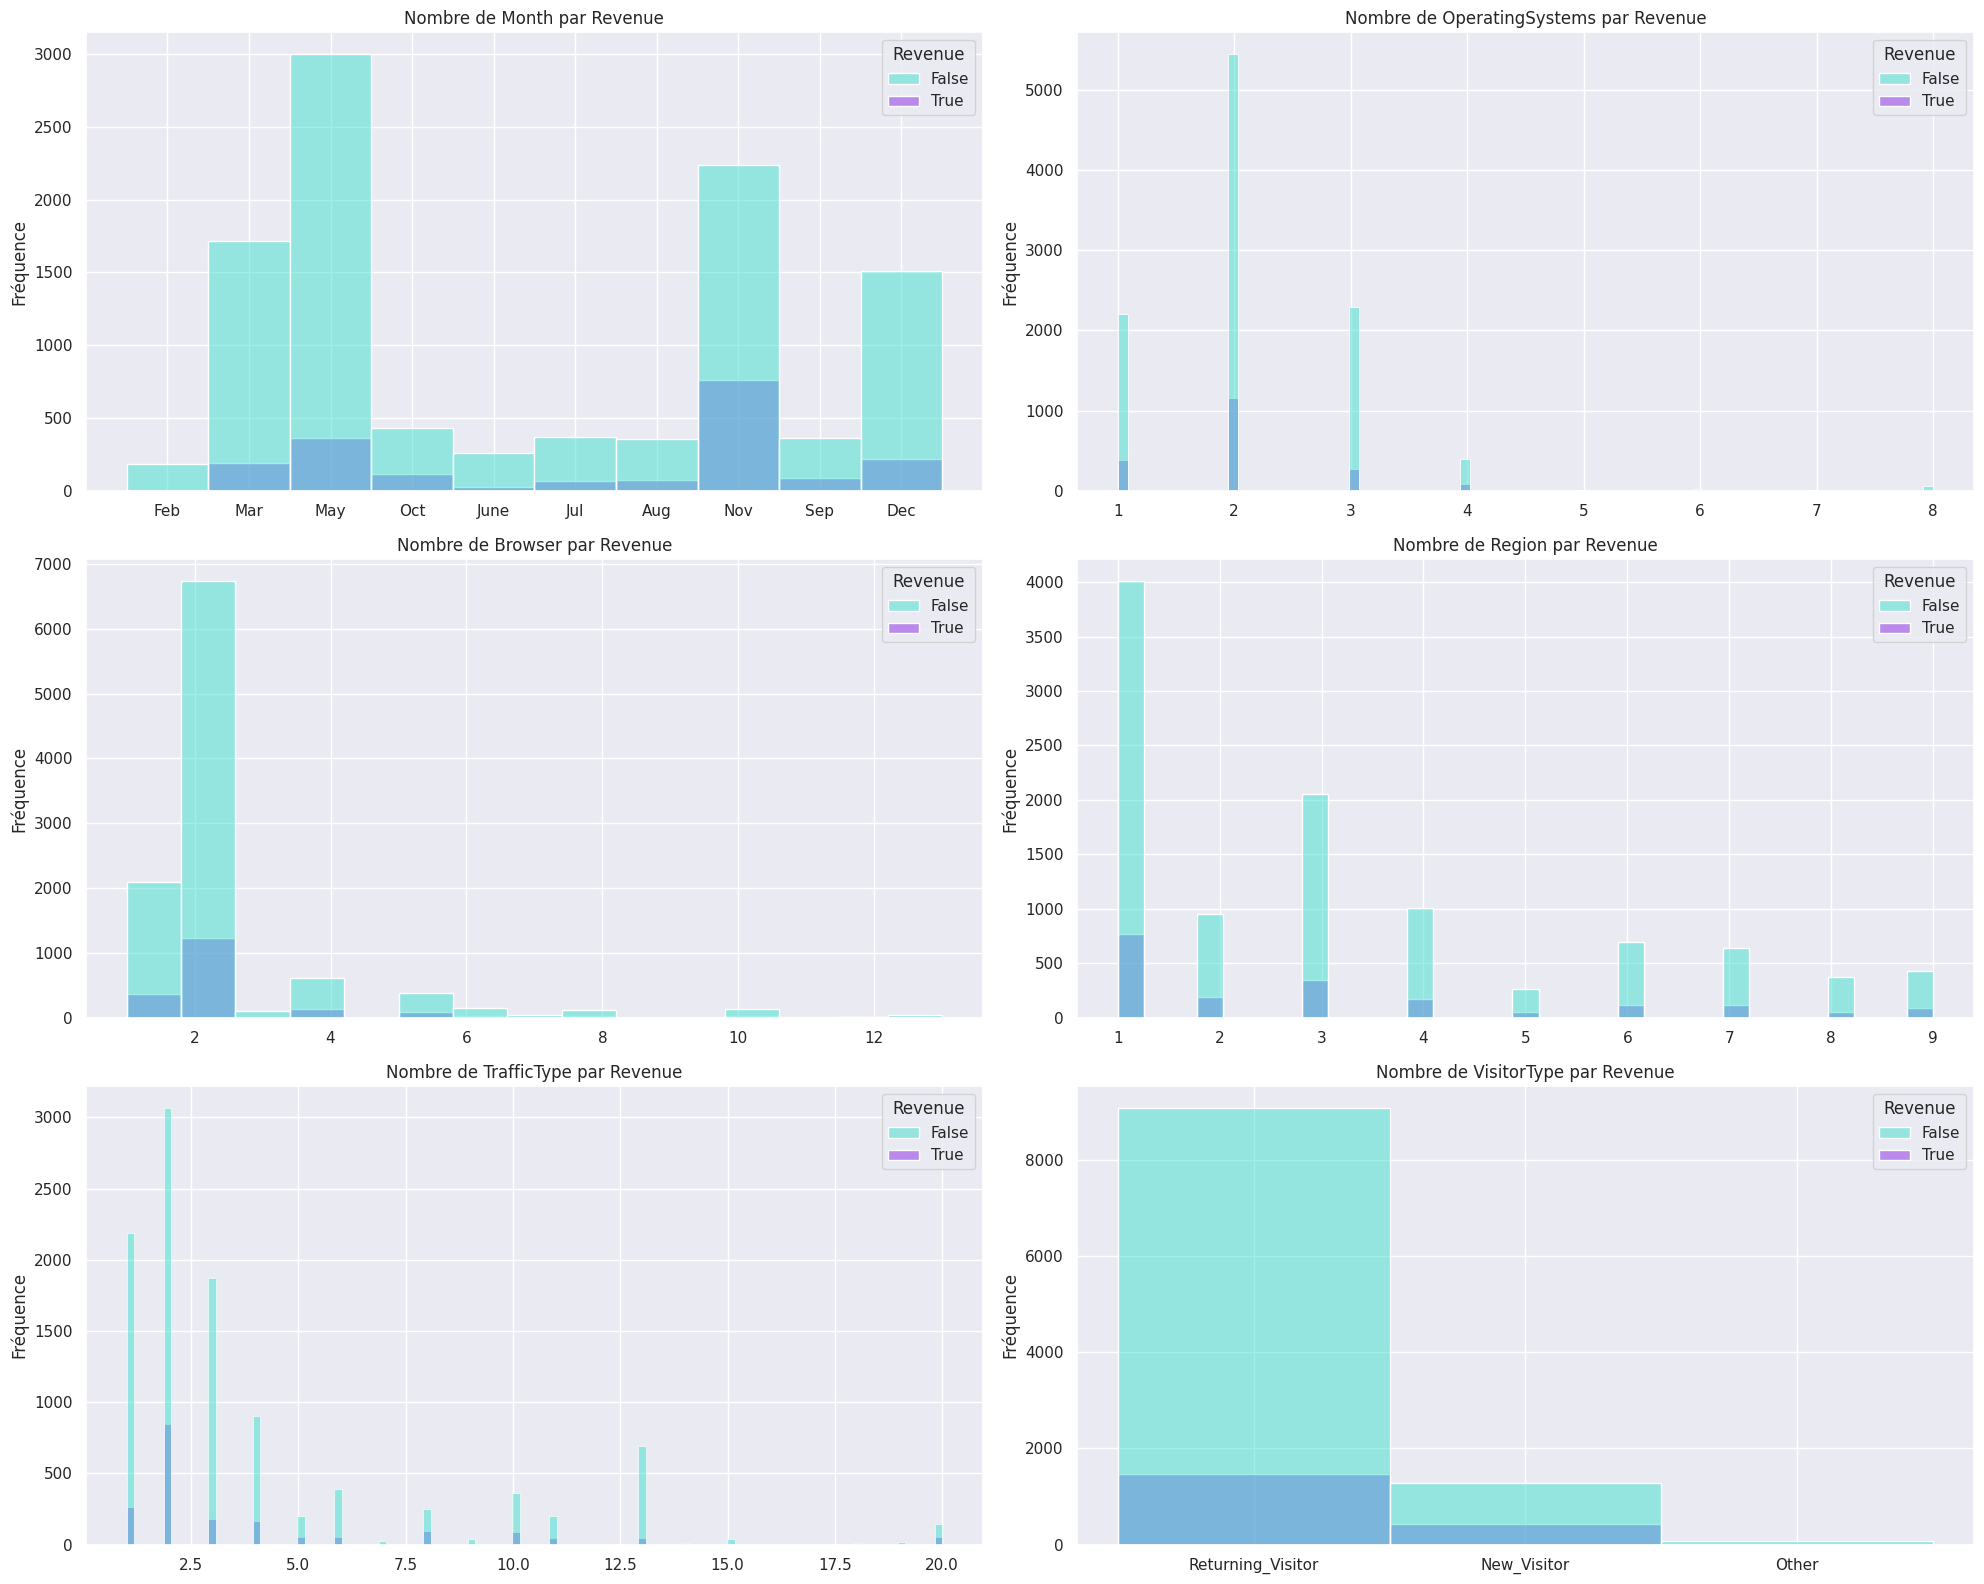

In [7]:
# Configurer la figure matplotlib
fig, axes = plt.subplots(3, 2, figsize=(20, 16))
custom_palette = ["turquoise", "blueviolet"]

# Tracer des histogrammes pour les caractéristiques numériques en fonction de la valeur de la variable cible « Revenu »
for col, ax in zip(df.select_dtypes(include='object').columns, axes.flatten()):
    sns.histplot(data=df, x=df[col].values, hue="Revenue", ax=ax,palette=custom_palette)
    ax.set_title(f'Nombre de {col} par Revenue')
    ax.set_ylabel("Fréquence")

plt.tight_layout()
plt.show()

Conclusions:
* __Month__: il semble y avoir une tendance saisonnière, certains mois comme novembre et mai ayant des fréquences d'achat plus élevées. Cela pourrait être dû aux périodes de magasinage des fêtes.

* __Operating System__: certains systèmes d'exploitation ont des fréquences d'achat plus élevées, ce qui peut indiquer une préférence de l'utilisateur ou une meilleure expérience utilisateur sur ces systèmes.

* __Browser__:Semblable au système d'exploitation, certains navigateurs affichent une fréquence d'achats plus élevée. Cela peut être dû à la compatibilité ou à la facilité de transaction sur certains navigateurs.


* __Region__: certaines régions affichent un comportement d'achat plus élevé. Cela pourrait être influencé par les promotions régionales ou les options d'expédition.

* __Traffic Type__: certains types de trafic vers le site sont plus susceptibles d'être convertis en achats. Par exemple, le trafic direct ou le trafic provenant de certaines campagnes marketing peuvent entraîner des conversions plus élevées.

* __Visitor Type__: les visiteurs connus sont plus susceptibles d'effectuer un achat que les nouveaux visiteurs, ce qui indique l'importance de la fidélisation de la clientèle et la valeur potentielle du ciblage des clients réguliers.

###Visualisation pour les caractéristiques numériques

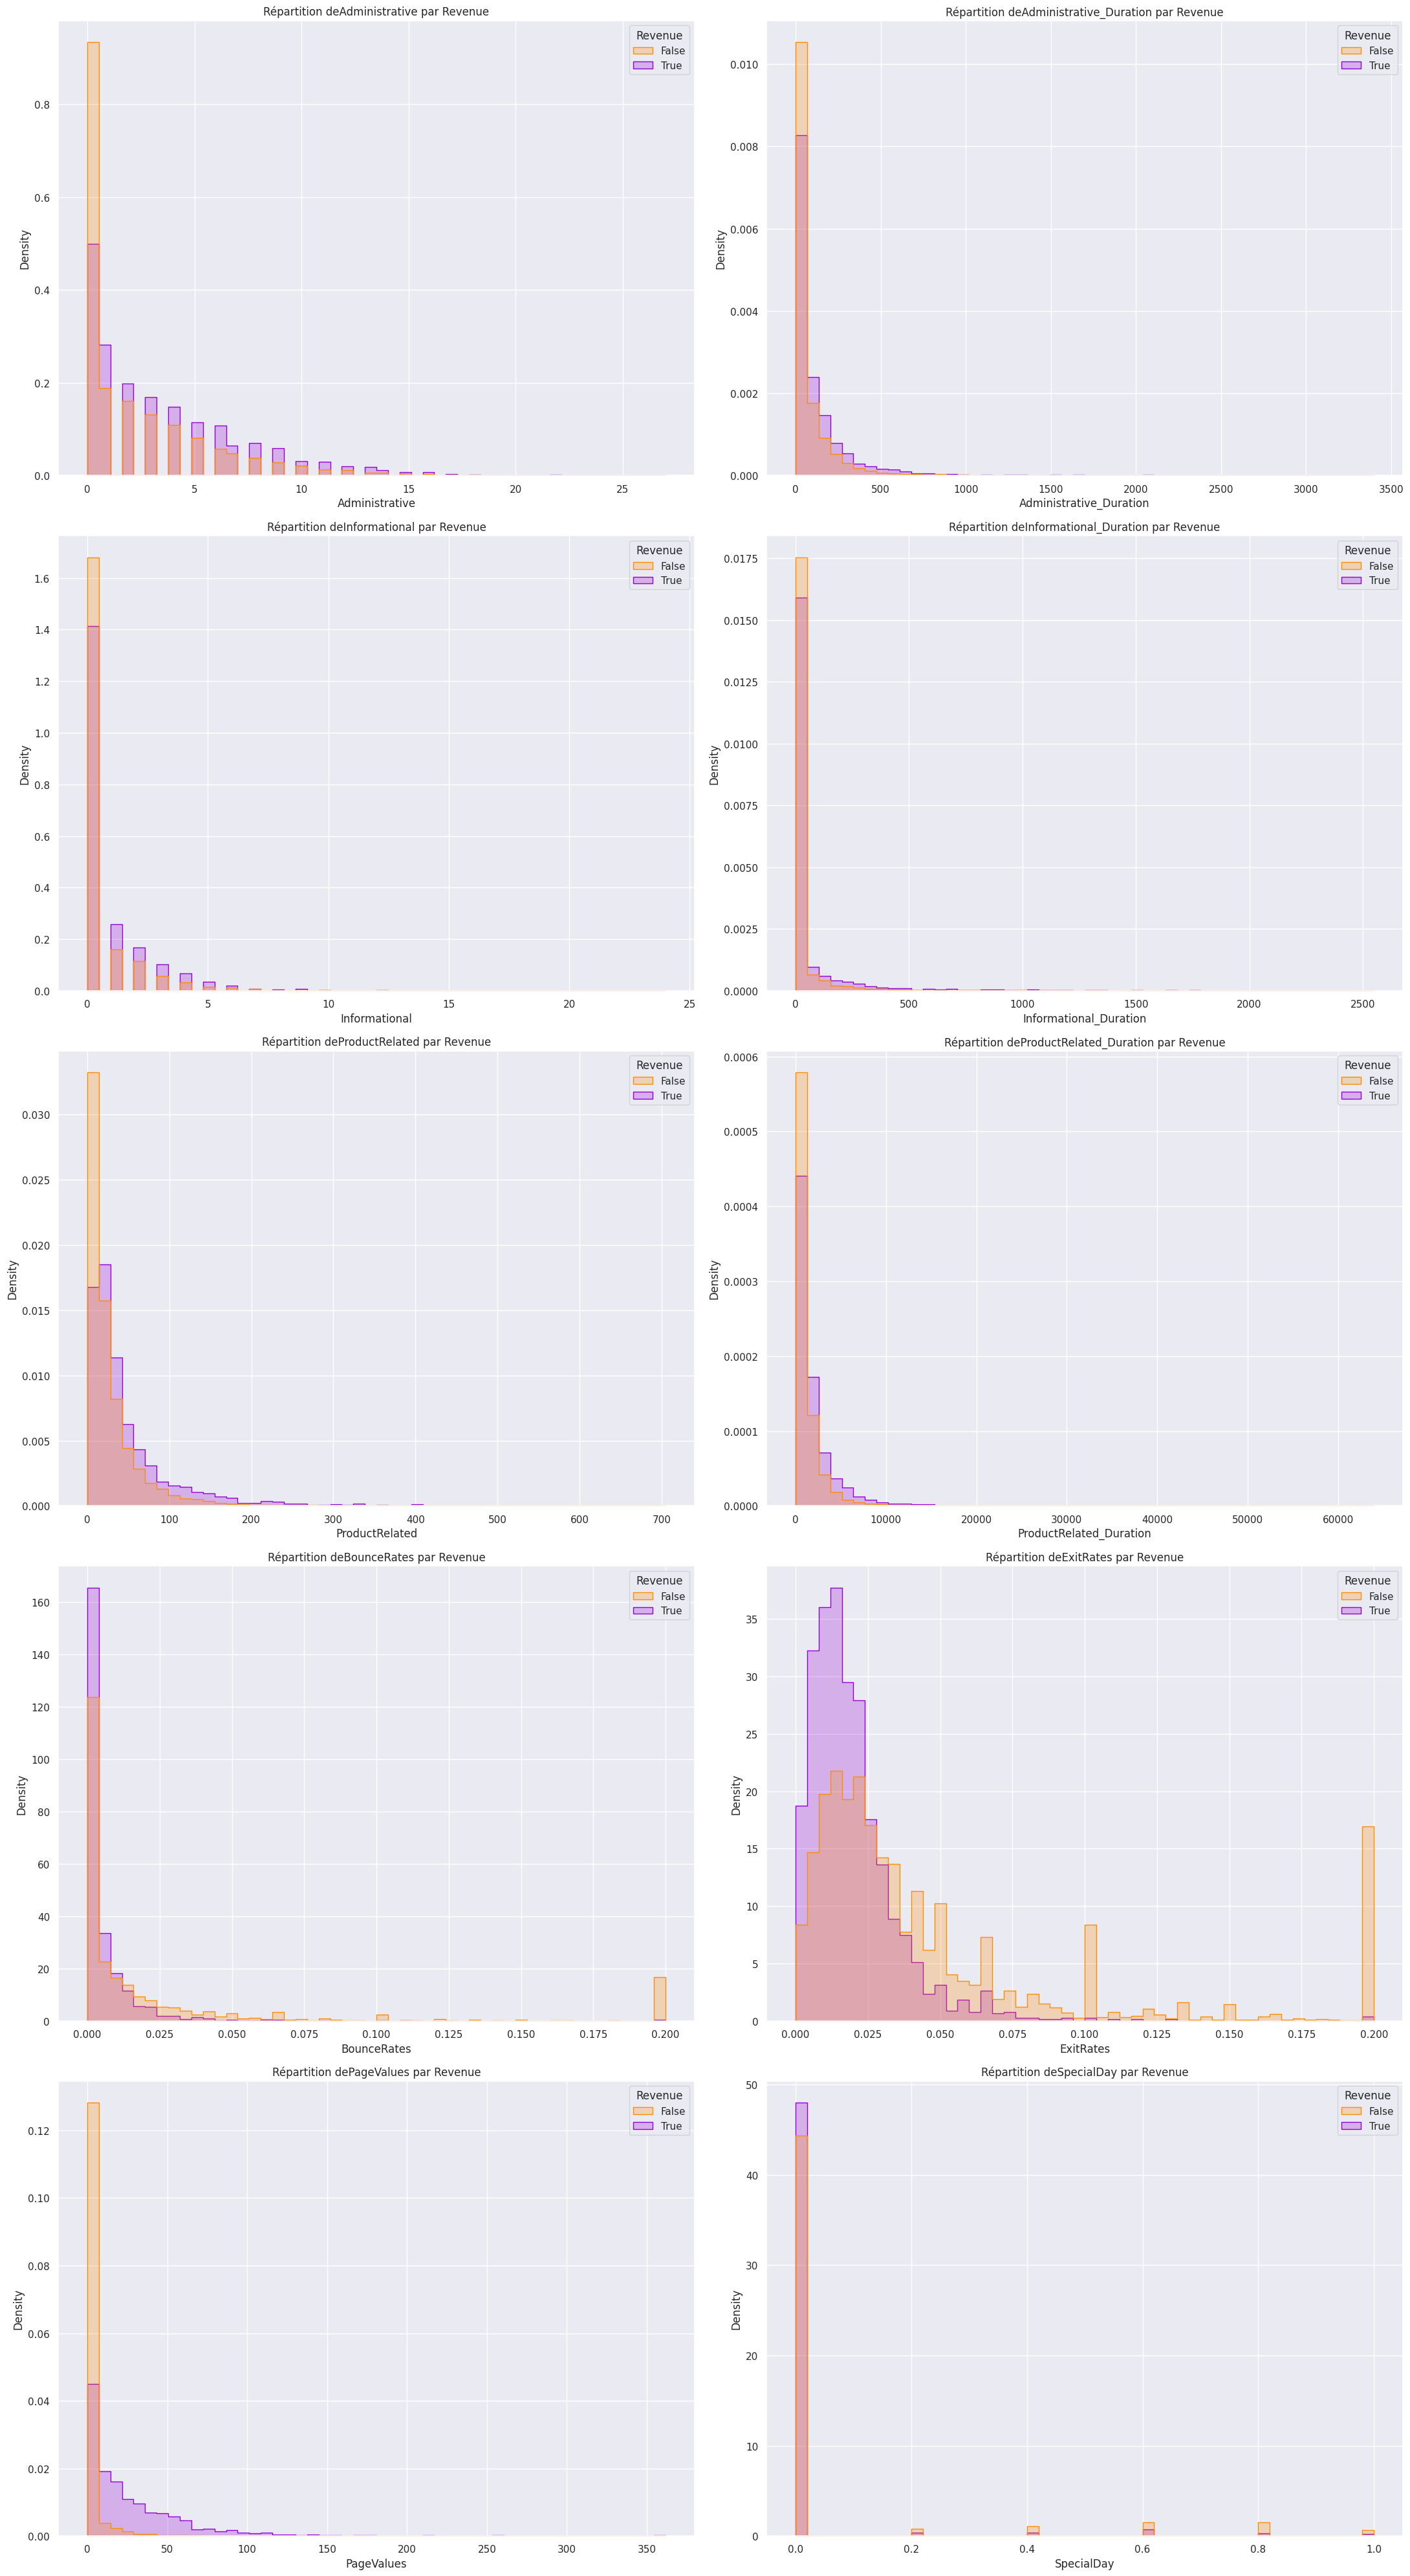

In [8]:
sns.set_theme()
# Configurer la figure matplotlib
fig, axes = plt.subplots(5, 2, figsize=(22, 40))
custom_palette = ["darkorange", "darkviolet"]
#Tracer des histogrammes pour les caractéristiques numériques en fonction de la valeur de la variable cible « Revenu »
for col, ax in zip(df.select_dtypes(include='number').columns, axes.flatten()):
    sns.histplot(data=df, x=col, hue="Revenue", element="step", stat="density", common_norm=False, bins=50, ax=ax, palette=custom_palette)
    ax.set_title(f'Répartition de{col} par Revenue')

plt.tight_layout()
plt.show()


Les histogrammes divisés par la variable cible Revenue nous donnent un aperçu de la manière dont les différents comportements des utilisateurs et interactions sur le site sont associés à la probabilité qu'une session aboutisse à une transaction.

* __Administrative, Informational, Product Related__:  le nombre de pages visitées dans ces catégories est généralement plus élevé pour les sessions qui génèrent des revenus. Cela suggère que l'interaction avec le contenu de ces différents types de pages est positivement associée à la probabilité d'une transaction.

* __Administrative Duration, Informational Duration, Product Related Duration__: de même, le temps passé sur ces types de pages est plus élevé pour les sessions génératrices de revenus. Cela implique que non seulement le nombre de pages, mais également la profondeur de l'engagement (mesurée par le temps) sont en corrélation avec la probabilité de transaction.

* __Bounce Rate__:  les sessions qui n'ont pas généré de revenus ont tendance à avoir un taux de rebond plus élevé. Un taux de rebond élevé implique que les utilisateurs quittent le site après avoir consulté une seule page, ce qui est associé négativement aux transactions.

* __Exit Rate__: les sessions sans revenus ont des taux de sortie plus élevés, ce qui indique que les utilisateurs sont plus susceptibles de quitter le site à partir d'une page donnée. Un taux de sortie plus faible lors des sessions génératrices de revenus suggère que les utilisateurs parcourent davantage de pages avant de terminer leur session, ce qui est un signe positif d'engagement.


* __Page Value__:  il existe une distinction claire dans la répartition de la valeur des pages entre les sessions payantes et non payantes. Les pages visitées avant une transaction ont des valeurs de page plus élevées, ce qui montre leur importance dans le processus de conversion.

* __Special Day__: l'histogramme montre que la présence de revenus est plus probable lorsque la valeur du « Jour spécial » est plus proche de zéro, ce qui implique que les jours normaux peuvent entraîner plus de transactions que les jours spéciaux, ce qui pourrait être contre-intuitif et justifier une enquête plus approfondie.

# **Analyse Exploratoire des Données (EDA).**

### Statistiques générales
Pour comprendre la distribution des données, identifier les anomalies et avoir une idée de la qualité des données.

Commençons par la qualité des données

In [9]:
# Rechercher des valeurs nulles
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Il n'y a aucune valeur manquante dans l'ensemble de données**

In [10]:
# Rechercher des valeurs en double
df.duplicated().sum(), df.shape

(125, (12330, 18))

Il n'y a aucune valeur manquante dans l'ensemble de données mais nous avons trouvé 125 lignes en double. Étant donné qu’il s’agit de doublons complets, nous les supprimerons.

In [11]:
# Nous nous débarrassons des données dupliquées
df.drop_duplicates(inplace=True, keep='first')
df.duplicated().sum(), df.shape

(0, (12205, 18))

Examinons maintenant les mesures telles que la moyenne, la médiane, l'écart type et le nombre pour les attributs numériques, ainsi que les nombres de fréquences pour les attributs catégoriels.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  object 
 12  Browser                  12205 non-null  object 
 13  Region                   12205 non-null  object 
 14  TrafficType           

Parmi les fonctionnalités que nous avons : 1 attribut booléen, 14 attributs numériques et 2 attributs catégoriels.

Calculons maintenant les statistiques générales de l'ensemble de données.

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


On peut noter que :

1. Les attributs '**Administrative**', '**Informational**', '**Product** **Related**', et leurs attributs de durée respectifs affichent un large éventail de valeurs. Cela suggère une variation significative dans la manière dont les différents visiteurs interagissent avec le site Web. Par exemple, les visites « liées au produit » vont de 0 à 705, indiquant divers niveaux d'engagement des visiteurs.

2. '**Administrative Duration**', '**Informational Duration**', et '**Product Related Duration**' présentent des écarts types élevés par rapport à leurs moyennes, ce qui suggère que le temps passé sur ces pages varie considérablement selon les utilisateurs.

3. '**Bounce Rates**' et '**Exit Rates**' sont en moyenne relativement faibles mais avec une variabilité notable (écart type proche de la moyenne). Cela indique que même si la plupart des pages réussissent bien à fidéliser les visiteurs, certaines pages peuvent inciter les visiteurs à partir.

4. L'attribut  '**Page Values**', qui indique la valeur moyenne d'une page Web dans le cheminement vers une transaction, varie considérablement (moyenne de 5,89 mais un écart type élevé de 18,57), ce qui suggère que certaines pages ont beaucoup plus d'influence dans le leadership. aux ventes.

5. '**Special Day**' a une moyenne faible (0,061), ce qui indique que la plupart des visites ne se situent pas à proximité de jours spéciaux. Cependant, une analyse plus approfondie pourrait révéler des pics de transactions ou de visites à des dates précises.

In [14]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Les utilisateurs visitent 2 pages d'administration et les pages relatives aux produits. Cependant, il y a très peu ou pas d'engagement avec les pages d'information.

In [15]:
df.describe(include=['object', 'bool'])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12205,12205,12205,12205,12205,12205,12205,12205
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3329,6541,7883,4714,3911,10431,9346,10297


L'ensemble de données contient des enregistrements de 10 mois uniques ; "May" est le mois qui se produit le plus fréquemment.

Il existe 3 types de visiteurs uniques, "Returning_visitor" étant le type le plus courant ; survenu en 10 551 cas.

### Matrice de corrélation

<ipython-input-16-f1878d7b3f7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap =sns.heatmap(df.corr(),annot=True,cmap='BrBG')


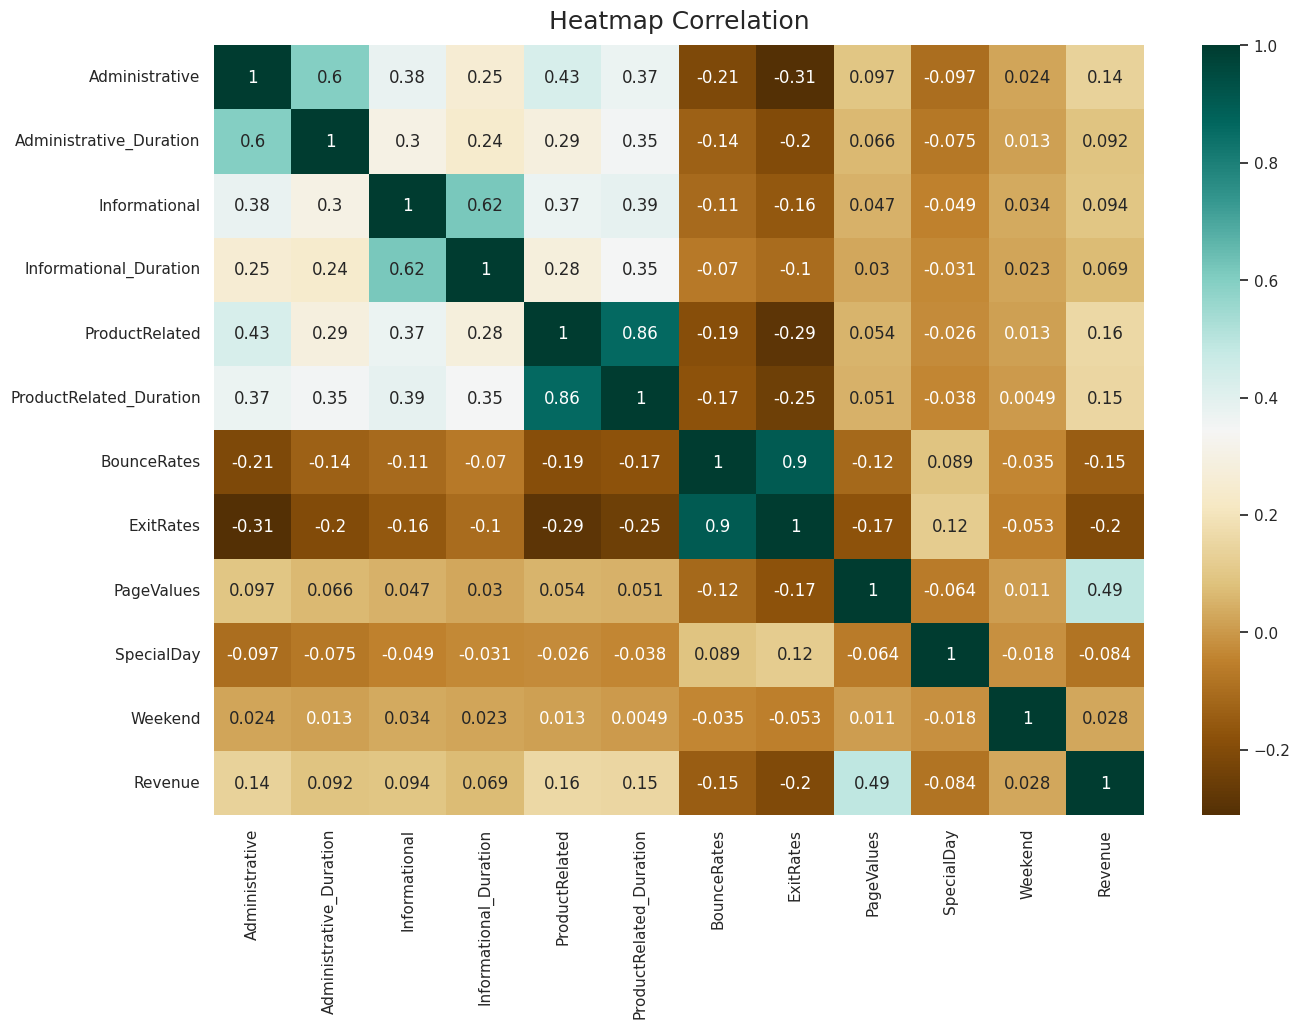

In [16]:
plt.figure(figsize=(15,10))
heatmap =sns.heatmap(df.corr(),annot=True,cmap='BrBG')
heatmap.set_title('Heatmap Correlation', fontdict={'fontsize':18}, pad=12);

***Heatmap montre qu'il existe peu de corrélation entre les différentes fonctionnalités, à l'exception des éléments suivants :***

- Forte corrélation entre :

        - BounceRates & ExitRates (0.91).
        - ProductRelated & ProductRelated_Duration (0.86).
- Corrélations modérées:

        - Administrative & Administrative DUration (0.6)
        - Informational & Informational Duration (0.62)
        - Page Values & Revenue (0.49)

### Analyse des métriques
* Bounce Rates
* Exit Rates
* Page Values

<ipython-input-17-53f693f88343>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0], x=df['BounceRates'], axlabel='Bounce Rates',color='turquoise')
<ipython-input-17-53f693f88343>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1], x=df['ExitRates'], axlabel='Exit Rates',color='

<Axes: xlabel='Page Values', ylabel='Density'>

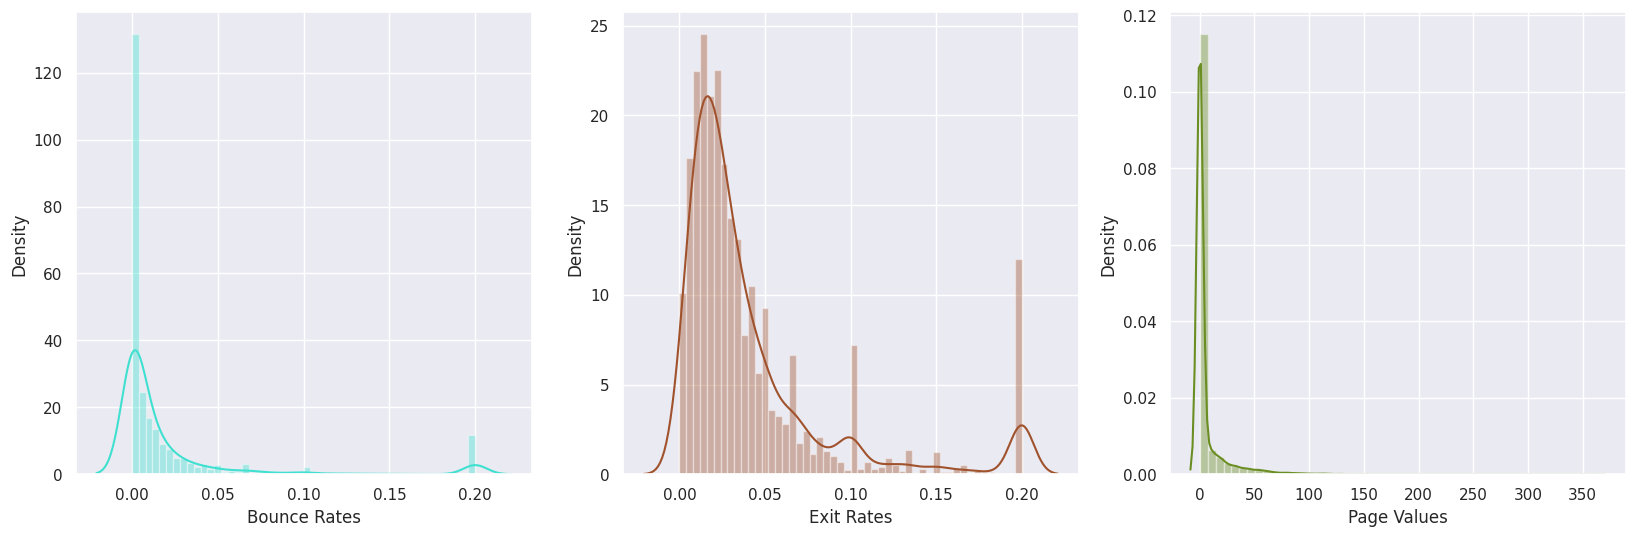

In [17]:
fig,axes = plt.subplots(1,3, figsize=(20,6))

sns.distplot(ax=axes[0], x=df['BounceRates'], axlabel='Bounce Rates',color='turquoise')
sns.distplot(ax=axes[1], x=df['ExitRates'], axlabel='Exit Rates',color='sienna')
sns.distplot(ax=axes[2], x=df['PageValues'], axlabel='Page Values', color='olivedrab')

#plt.tight_layout()
#plt.show()

Les diagrammes de distribution ci-dessus des métriques de page montrent les éléments suivants :

* Les 3 caractéristiques ont des distributions très asymétriques avec de nombreuses valeurs aberrantes.
* Le taux de bounce rate de la plupart de nos points de données est faible. Il s’agit d’une observation positive, car des taux élevés indiqueraient que les visiteurs n’interagissent pas avec le site Web.
* Exit rates sont plus élevés en valeurs que bounce rates. Ceci est attendu car nous pouvons supposer que les pages de confirmation de transaction entraîneront une augmentation du taux de sortie moyen.

### Revenue Analysis

### Distribution de la caractéristique Target (Revenue)

In [18]:
df.Revenue.value_counts()


False    10297
True      1908
Name: Revenue, dtype: int64

In [19]:
revenue_ratio = df.Revenue.value_counts(normalize=True)
revenue_ratio

False    0.843671
True     0.156329
Name: Revenue, dtype: float64

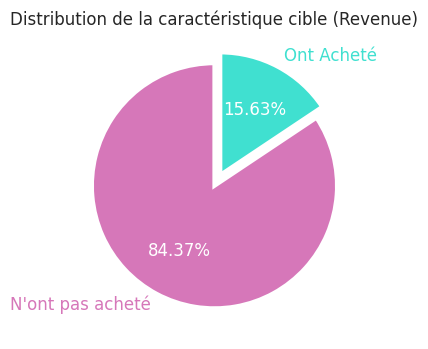

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))

x=revenue_ratio

cmap = plt.get_cmap('PuRd')
colors = list(cmap(np.linspace(0.45, len(x))))

colors[1]='turquoise'
labels = ["N'ont pas acheté",'Ont Acheté']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=90,
    colors=colors,
    explode=(0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=300)
ax.set_title('Distribution de la caractéristique cible (Revenue)', fontsize=12)
plt.tight_layout()

***Il existe un déséquilibre dans la variable de sortie (« Revenue »), où la proportion de visiteurs qui n'ont pas effectué d'achat par rapport à ceux qui ont effectué un achat est respectivement de 84,37 % et 15,63 %.***

### Revenus par type de visiteur

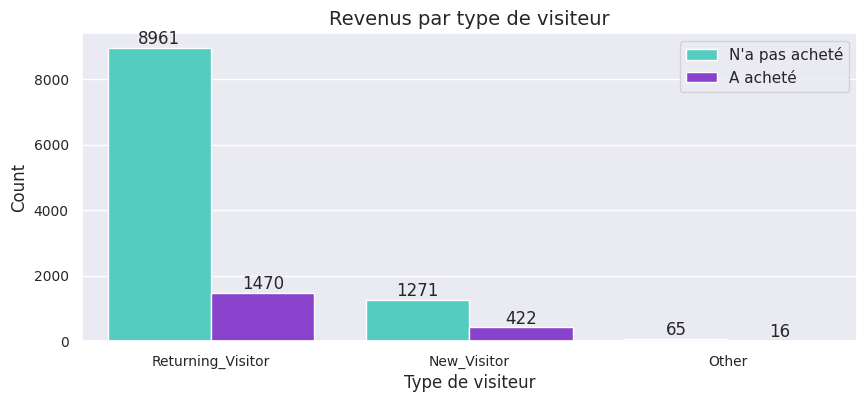

In [21]:
plt.figure(figsize=(10,4))
custom_palette = ["turquoise", "blueviolet"]
plt.title("Revenus par type de visiteur", fontsize=14)
ax = sns.countplot(x='VisitorType', data=df, hue = 'Revenue', palette=custom_palette)
ax.legend(labels=["N'a pas acheté","A acheté"])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Type de visiteur", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Revenu par mois

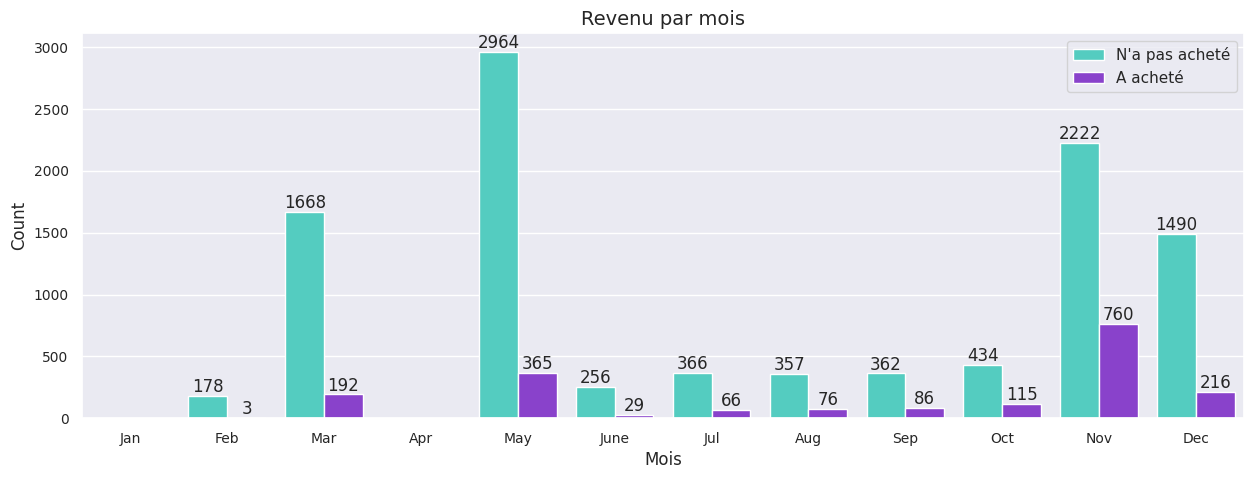

In [22]:
plt.figure(figsize=(15,5))
plt.title("Revenu par mois", fontsize=14)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
custom_palette = ["turquoise", "blueviolet"]
ax = sns.countplot(x='Month', data=df, hue = 'Revenue', order=orderlist, palette=custom_palette)
ax.legend(labels=["N'a pas acheté","A acheté"])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* ***En janvier et avril, aucune visite du site Web n'a été enregistrée.***
* ***De nombreuses transactions ont lieu vers la fin de l'année, novembre et décembre enregistrant les revenus générés les plus élevés et les troisièmes. Cependant, ces mois ne connaissent pas les visites de sites Web les plus élevées enregistrées.***
* ***Les quatre mois avec le plus de visites sont mai, novembre, mars et décembre.***

### Revenus par type de page/durée

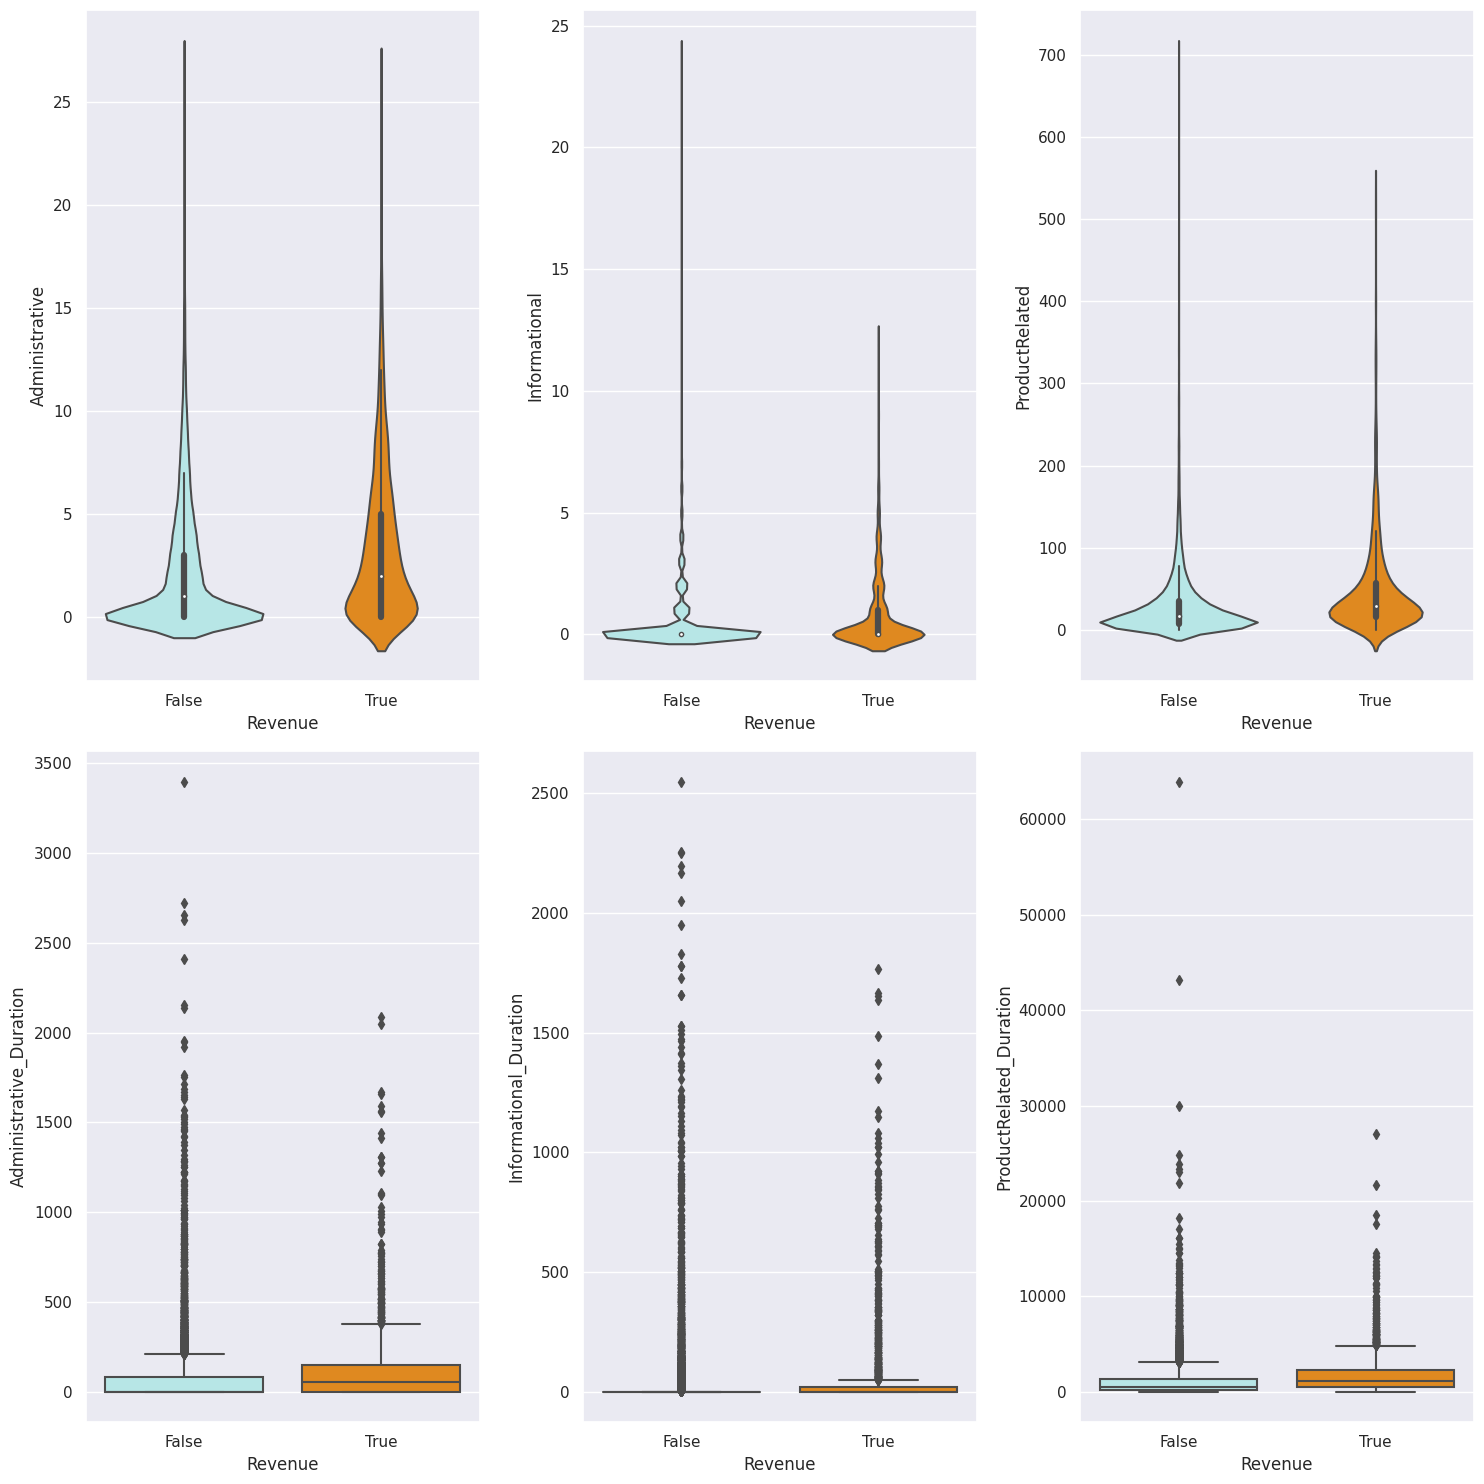

In [23]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

custom_palette = ["paleturquoise", "darkorange"]

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1, palette=custom_palette)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2, palette=custom_palette)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3, palette=custom_palette)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4, palette=custom_palette)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5, palette=custom_palette)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6, palette=custom_palette)

plt.tight_layout()
plt.show()

* ***Les visiteurs ont tendance à visiter moins de pages et à passer moins de temps s'ils ne souhaitent pas effectuer d'achat.***
* ***Le nombre de pages liées aux produits visitées et le temps passé dessus sont supérieurs à ceux des pages liées au compte ou aux informations.***

### Analyse bivariée

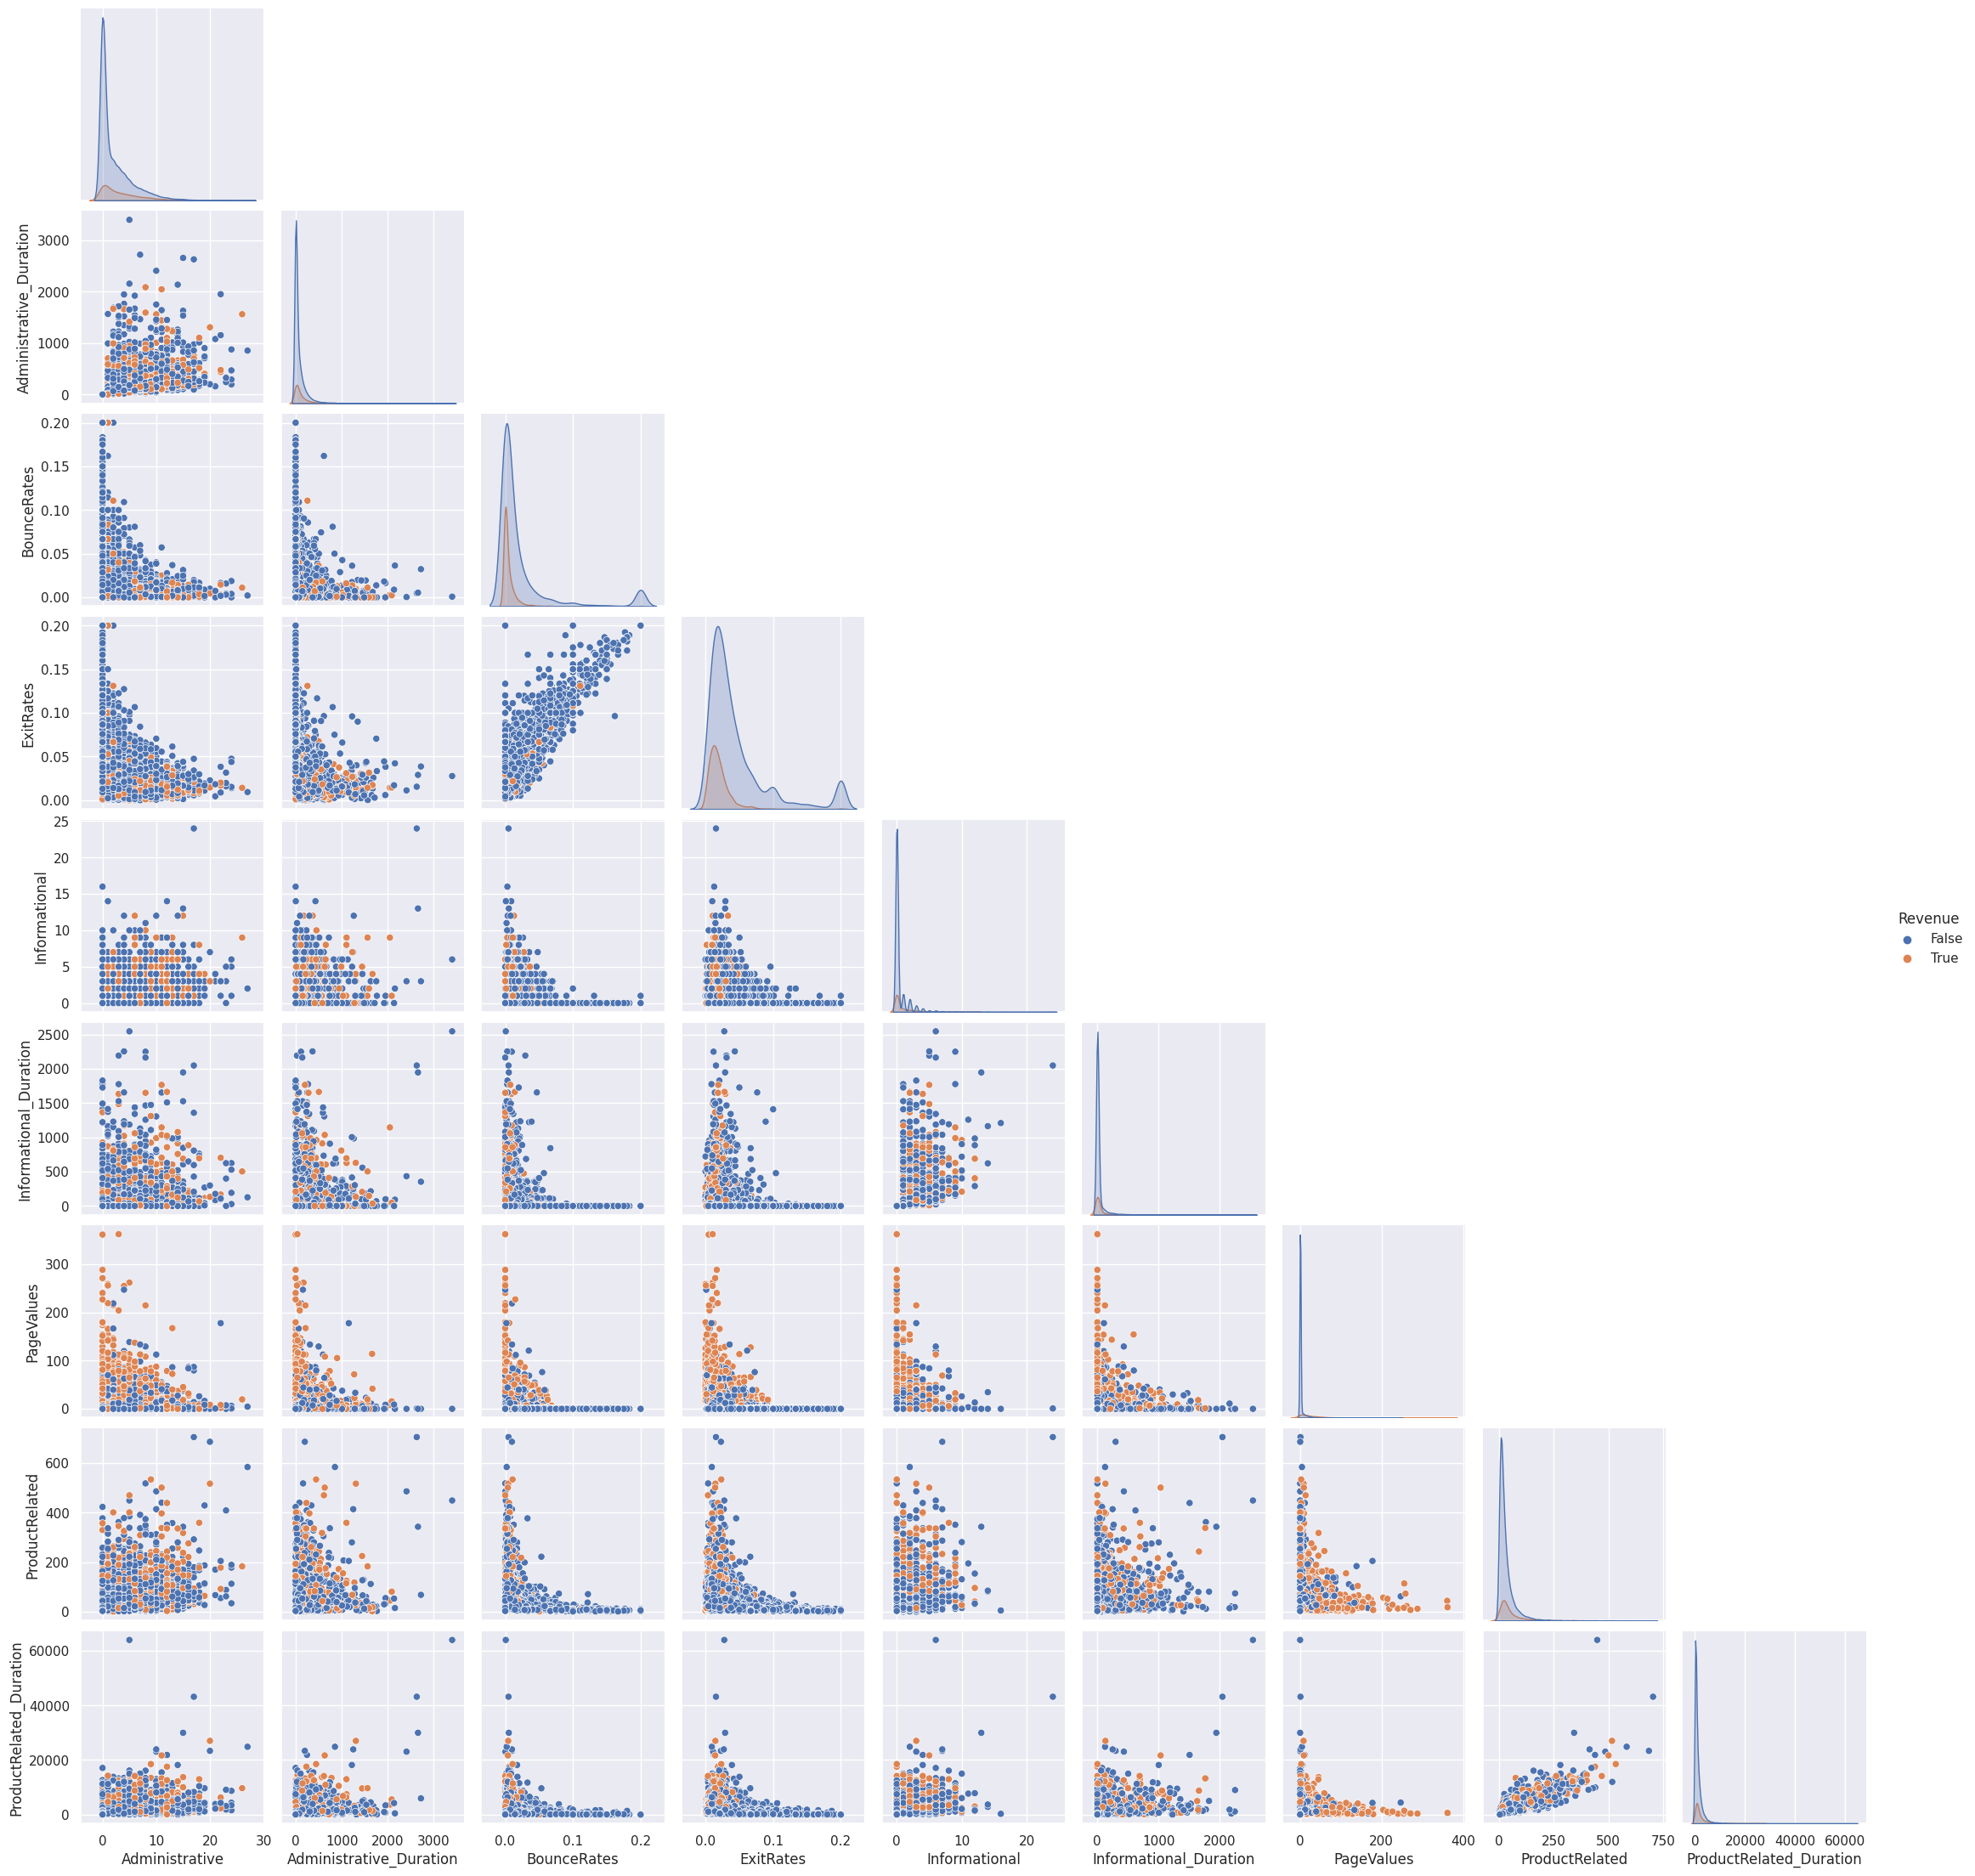

In [24]:
sns.pairplot(df[df.select_dtypes(include=['number', 'bool']).columns.difference(['SpecialDay', 'Weekend'])], hue = 'Revenue', corner=True)

### Données déséquilibrées

In [25]:
df.Revenue.value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [26]:
1908/10297

0.1852966883558318

## Matrice de corrélation

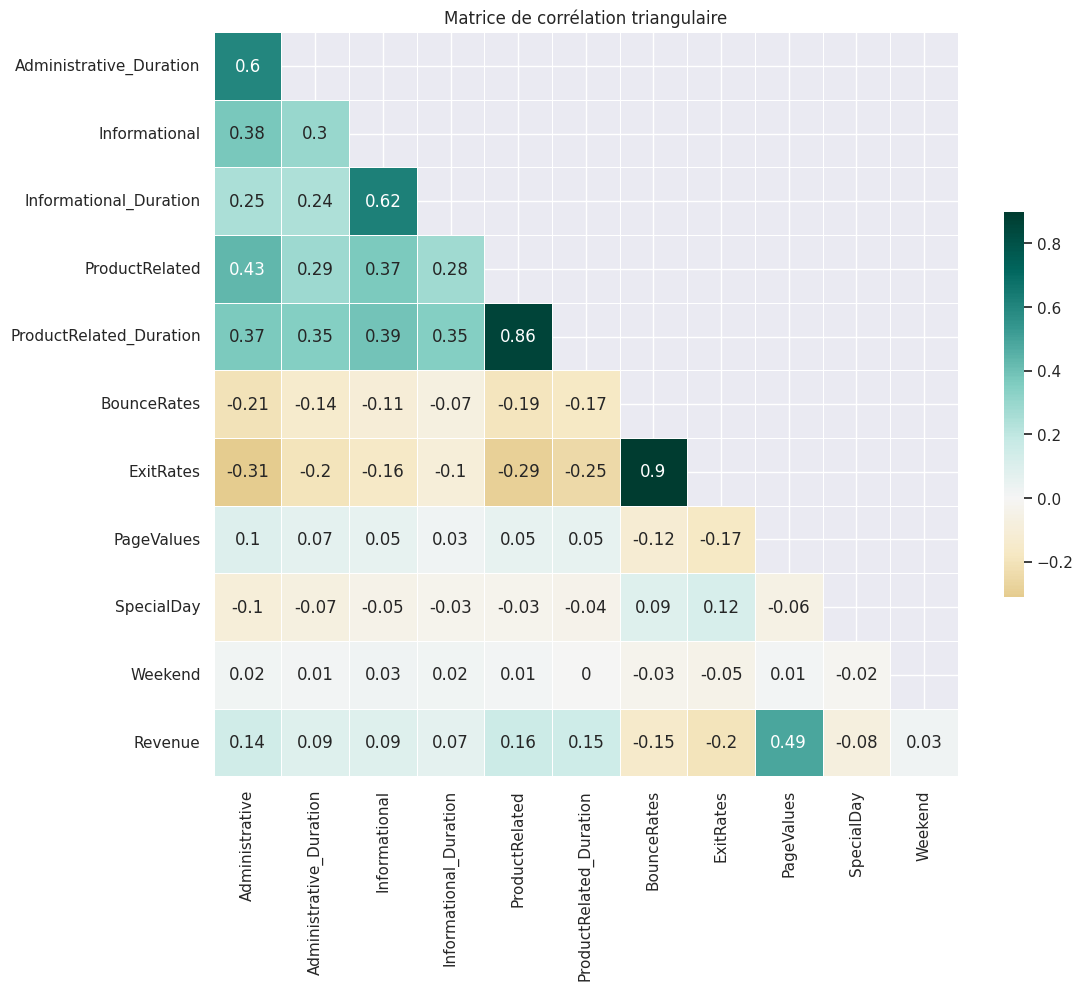

In [27]:
#Déplacer le libellé Revenu vers la fin pour une meilleure visualisation
cols = [c for c in df if c != 'Revenue'] + ['Revenue']
df = df[cols]

# Matrice de corrélation
df_corr_matrix = df[df.select_dtypes(include=['number', 'bool']).columns].corr().round(2)

# Plotting
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_corr_matrix))
cmap = sns.diverging_palette(230, 20, n=100)
ax = sns.heatmap(df_corr_matrix, mask=mask, annot=True, cmap='BrBG', center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xlim(0,len(df_corr_matrix)-1)
ax.set_ylim(len(df_corr_matrix),1)
plt.title('Matrice de corrélation triangulaire')
plt.show()

## Prétraitement

### Encodage de la fonctionnalité Mois à l'aide de l'encodage cyclique

In [28]:
# Attribuer une valeur numérique à chaque mois
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5,
    'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9,
    'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['month_num'] = df['Month'].map(month_to_num)

# Encoder avec sinus et cosinus
df['month_sin'] = np.sin((df['month_num'] - 1) * (2. * np.pi / 12))
df['month_cos'] = np.cos((df['month_num'] - 1) * (2. * np.pi / 12))

df.drop(columns=['Month', 'month_num'], inplace=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,month_sin,month_cos
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,0.5,0.866025
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,0.5,0.866025
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,0.5,0.866025
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,0.5,0.866025
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,True,False,0.5,0.866025


### Encodage de caractéristique VisitorType

In [29]:
df['VisitorType_Returning_Visitor'] = 0
df['VisitorType_New_Visitor'] = 0
df['VisitorType_Other'] = 0

df.loc[df['VisitorType']=='Returning_Visitor', 'VisitorType_Returning_Visitor'] = 1
df.loc[df['VisitorType']=='New_Visitor', 'VisitorType_New_Visitor'] = 1
df.loc[df['VisitorType']=='Other', 'VisitorType_Other'] = 1

df.drop(columns=['VisitorType'], inplace=True)

###Encodage de toutes les autres fonctionnalités catégorielles avec OneHotEncoding

In [30]:
encoder = OneHotEncoder(sparse_output=False)

for col in df.select_dtypes(include='object'):
    transformed = encoder.fit_transform(df[[col]])

    encoded_df = pd.DataFrame(transformed, columns=[f"{col}_{category}" for category in encoder.categories_[0]]) # Create a DataFrame from the encoded columns

    df = df.join(encoded_df.set_index(df.index)) # Ajouter les nouvelles colonnes au DataFrame d'origine


df.drop(columns=df.select_dtypes(include='object').columns, inplace=True) # Supprimer les colonnes catégorielles d'origine


In [31]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'month_sin', 'month_cos', 'VisitorType_Returning_Visitor',
       'VisitorType_New_Visitor', 'VisitorType_Other', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'Traffic

## Train-test split

In [32]:
y = df['Revenue'] # Étiquettes
X = df[df.columns.difference(['Revenue']).to_list()] # Caractéristiques

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Former et évaluer les modèles**
Les modèles prédictifs qui seront utilisés sont la régression logistique, le classificateur KNeighbours, le SVM, l'arbre de décision et le classificateur de forêt aléatoire.

In [34]:
#Matrice de confusion
def c_matrix_plot(y_test,prediction):

    c_matrix = confusion_matrix(y_test,prediction)
    group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in
                    c_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='BrBG')

    ax.set_xlabel('\n Valeurs prédites')
    ax.set_ylabel('Valeurs Actualles');

    ax.xaxis.set_ticklabels(["N'a pas acheté","A acheté"])
    ax.yaxis.set_ticklabels(["N'a pas acheté","A acheté"])

    plt.show()

# **Modèle de régression logistique ou Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Pour la régression logistique, Accuracy score is  0.8828349037279803
              precision    recall  f1-score   support

       False       0.90      0.97      0.93      2079
        True       0.71      0.36      0.47       362

    accuracy                           0.88      2441
   macro avg       0.80      0.67      0.70      2441
weighted avg       0.87      0.88      0.87      2441

[[2026   53]
 [ 233  129]]

	Matrice de confusion pour la régression logistique


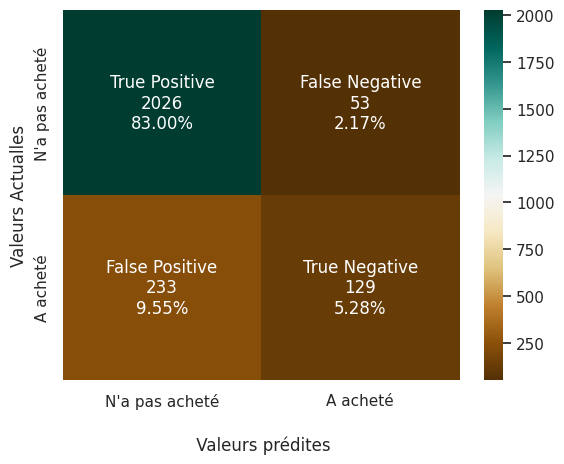

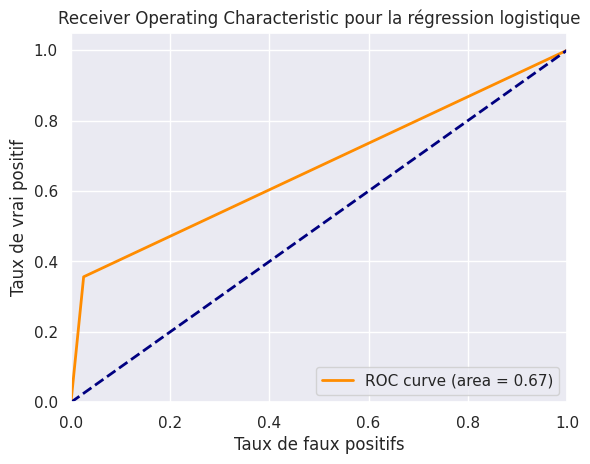

In [46]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
LR_preds = LR.predict(X_test)
print('\nPour la régression logistique, Accuracy score is ', accuracy_score(y_test,LR_preds))
print(classification_report(y_test, LR_preds))
print(confusion_matrix(y_test, LR_preds))
print('\n\tMatrice de confusion pour la régression logistique')
c_matrix_plot(y_test, LR_preds)

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, LR_preds)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positif')
plt.title('Receiver Operating Characteristic pour la régression logistique')
plt.legend(loc="lower right")
plt.show()


# **Modèle des K plus proches voisins ou  K Neighbors**


Pour les K-voisins les plus proches, Accuracy est  0.8643998361327325
              precision    recall  f1-score   support

       False       0.89      0.96      0.92      2079
        True       0.59      0.29      0.39       362

    accuracy                           0.86      2441
   macro avg       0.74      0.63      0.65      2441
weighted avg       0.84      0.86      0.84      2441

[[2006   73]
 [ 258  104]]

	Matrice de confusion pour les K-voisins les plus proches


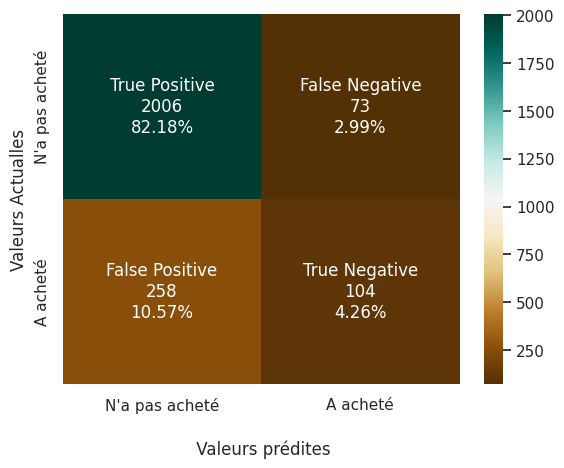

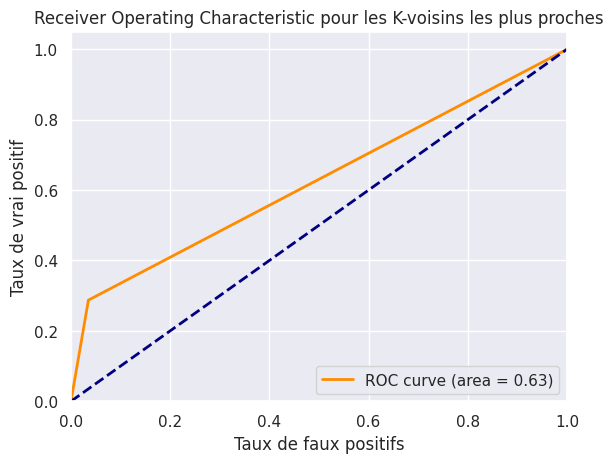

In [47]:
KN = KNeighborsClassifier()
KN = KN.fit(X_train, y_train)
KN_preds = KN.predict(X_test)
print('\nPour les K-voisins les plus proches, Accuracy est ', accuracy_score(y_test,KN_preds))
print(classification_report(y_test, KN_preds))
print(confusion_matrix(y_test, KN_preds))
print('\n\tMatrice de confusion pour les K-voisins les plus proches')
c_matrix_plot(y_test, KN_preds)


fpr_kn, tpr_kn, threshold_kn = roc_curve(y_test, KN_preds)
roc_auc_kn = auc(fpr_kn, tpr_kn)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr_kn, tpr_kn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_kn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positif')
plt.title('Receiver Operating Characteristic pour les K-voisins les plus proches')
plt.legend(loc="lower right")
plt.show()


# **Modèle Support Vector Machine ou Machine à vecteurs de support(SVM)**


Pour SVM, Accuracy est  0.8529291274068005
              precision    recall  f1-score   support

       False       0.85      1.00      0.92      2079
        True       0.71      0.01      0.03       362

    accuracy                           0.85      2441
   macro avg       0.78      0.51      0.47      2441
weighted avg       0.83      0.85      0.79      2441

[[2077    2]
 [ 357    5]]

	Matrice de confusion  pour SVM


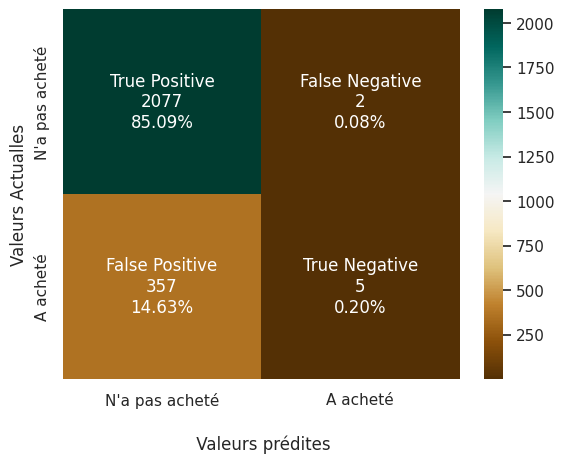

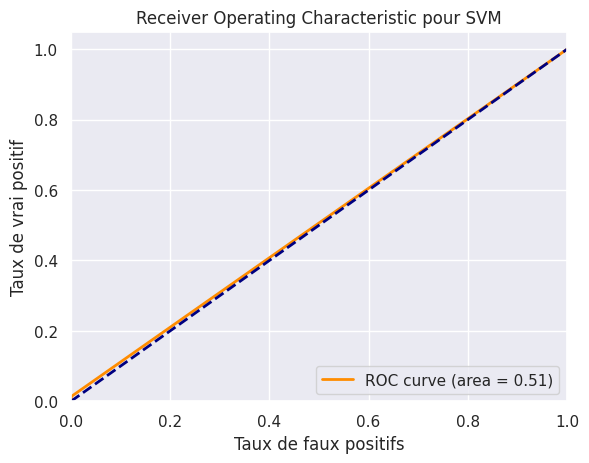

In [37]:
#SVM
SV = SVC()
SV = SV.fit(X_train, y_train)
SV_preds = SV.predict(X_test)
print('\nPour SVM, Accuracy est ', accuracy_score(y_test,SV_preds))
print(classification_report(y_test, SV_preds))
print(confusion_matrix(y_test, SV_preds))
print('\n\tMatrice de confusion  pour SVM')
c_matrix_plot(y_test, SV_preds)

fpr_sv, tpr_sv, threshold_sv = roc_curve(y_test, SV_preds)
roc_auc_sv = auc(fpr_sv, tpr_sv)
# Tracer la courbe ROC
plt.figure()
plt.plot(fpr_sv, tpr_sv, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_sv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positif')
plt.title('Receiver Operating Characteristic pour SVM')
plt.legend(loc="lower right")
plt.show()

# **Modèle d'arbre de décision ou Decision Tree**


Étant donné que les données sont déséquilibrées, je vais essayer d'utiliser un modèle arborescent qui est plus robuste pour les données déséquilibrées.


Pour Arbre de décision, Accuracy est  0.9029086439983613
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2079
        True       0.71      0.58      0.64       362

    accuracy                           0.90      2441
   macro avg       0.82      0.77      0.79      2441
weighted avg       0.90      0.90      0.90      2441

[[1994   85]
 [ 152  210]]

	Matrice de confusion pour classificateur Arbre de décision


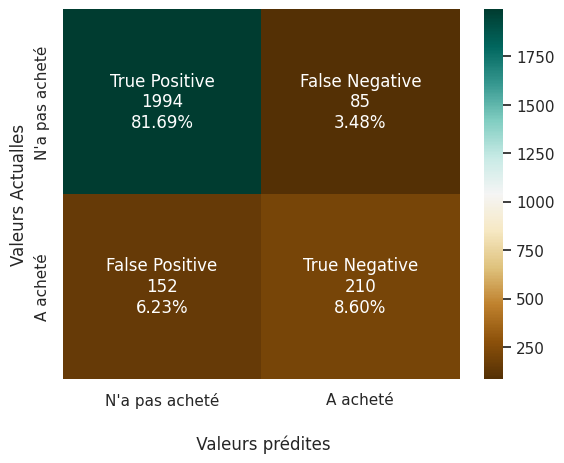

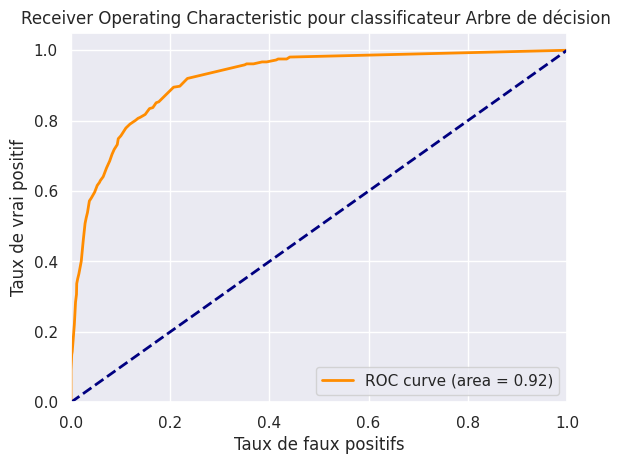

In [38]:
# Créer un pipeline qui met d'abord à l'échelle les données, puis applique le classificateur d'arbre de décision
pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50, random_state=42))
                ])

# Ajuster et prédire
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Prédire les probabilités pour les données de test
y_probs = pipe.predict_proba(X_test)[:, 1]  # obtenir la probabilité de la classe positive

# Évaluer le modèle
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nPour Arbre de décision, Accuracy est ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n\tMatrice de confusion pour classificateur Arbre de décision')
c_matrix_plot(y_test, y_pred)


# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positif')
plt.title('Receiver Operating Characteristic pour classificateur Arbre de décision ')
plt.legend(loc="lower right")
plt.show()

## **Importance des  des caractéristiques**

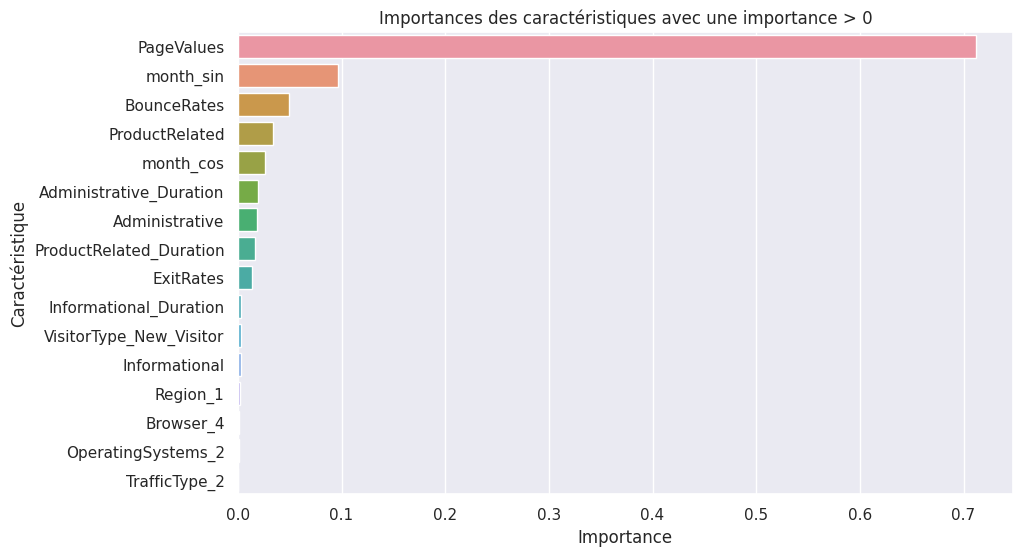

In [39]:
# Extraire l'importance des caractéristiques
feature_importances = pipe.named_steps['classifier'].feature_importances_


features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


features_df = features_df[features_df.Importance > 0] # supprimer une fonctionnalité sans importance
features_df = features_df.sort_values(by='Importance', ascending=False) # trier par importance

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Importances des caractéristiques avec une importance > 0')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.show()

Il semble que « PageValues ​​» soit considérablement plus important que toutes les autres caractéristiques. Essayons d'adapter un classificateur naïf en utilisant uniquement la caractéristique « PageValues ​​».

# **Adaptation du Modèle d'arbre de décision**


Pour Arbre de décision, Accuracy est  0.8680868496517821
              precision    recall  f1-score   support

       False       0.96      0.88      0.92      2079
        True       0.54      0.78      0.64       362

    accuracy                           0.87      2441
   macro avg       0.75      0.83      0.78      2441
weighted avg       0.90      0.87      0.88      2441

[[1837  242]
 [  80  282]]

	Matrice de confusion pour Arbre de decision


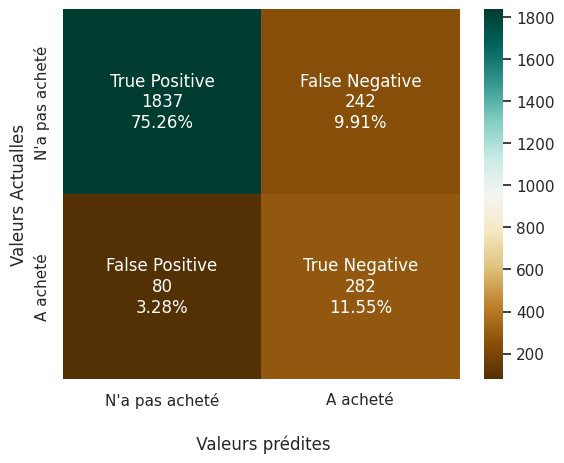

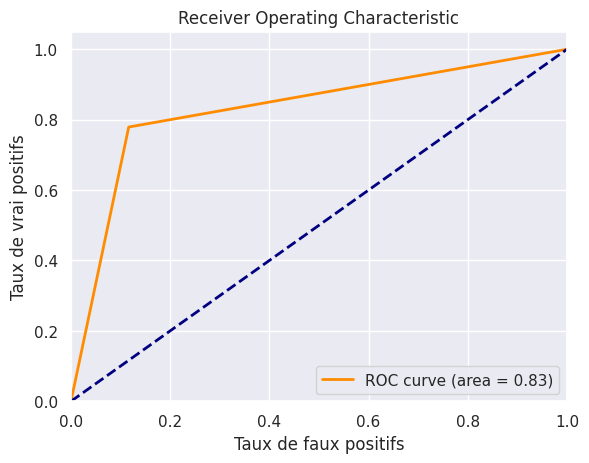

In [40]:
X_train_naive = X_train[['PageValues']]
X_test_naive = X_test[['PageValues']]
# Créer un pipeline qui met d'abord à l'échelle les données, puis applique le classificateur d'arbre de décision
pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42))
                ])

# Ajuster et prédire
pipe.fit(X_train_naive, y_train)
y_pred = pipe.predict(X_test_naive)

# Prédire les probabilités pour les données de test
y_probs = pipe.predict_proba(X_test_naive)[:, 1]  # obtenir la probabilité de la classe positive

# Évaluer le modèle
print('\nPour Arbre de décision, Accuracy est ', accuracy_score(y_test,y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
# Matrice de confusion
print(confusion_matrix(y_test, y_pred))
print('\n\tMatrice de confusion pour Arbre de decision')
c_matrix_plot(y_test, y_pred)

# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Utilisation de l'hyperparamètre class_weight pour gérer le déséquilibre des classes


Pour Arbre de décision, Accuracy est  0.8373617369930356
              precision    recall  f1-score   support

       False       0.97      0.84      0.90      2079
        True       0.47      0.84      0.60       362

    accuracy                           0.84      2441
   macro avg       0.72      0.84      0.75      2441
weighted avg       0.89      0.84      0.85      2441

[[1741  338]
 [  59  303]]

	Matrice de confusion pour Arbre de decision


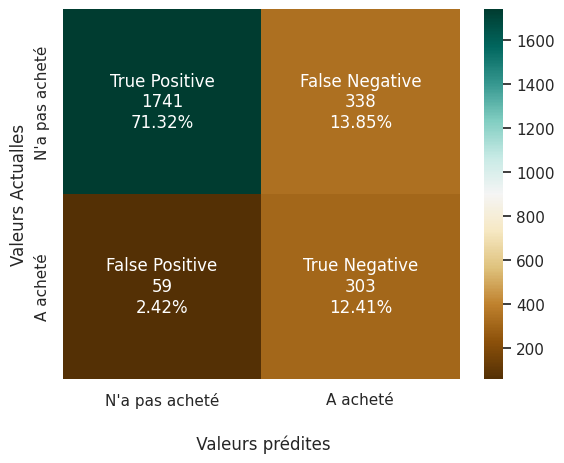

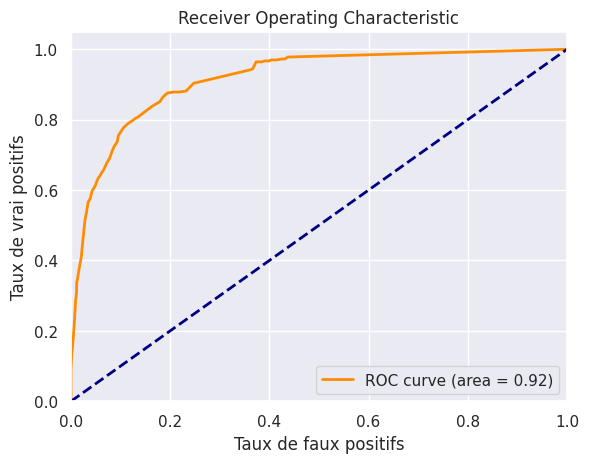

In [41]:
# Créer un pipeline qui met d'abord à l'échelle les données, puis applique le classificateur d'arbre de décision
pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50, class_weight='balanced', random_state=42))
                ])

# Ajuster et prédire
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


# Prédire les probabilités pour les données de test
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class


# Évaluer le modèle
print('\nPour Arbre de décision, Accuracy est ', accuracy_score(y_test,y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Matrice de confusion
print(confusion_matrix(y_test, y_pred))
print('\n\tMatrice de confusion pour Arbre de decision')
c_matrix_plot(y_test, y_pred)


# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Suréchantillonnage
Étant donné que les données sont très déséquilibrées dans l'étiquette, essayons d'utiliser la technique de suréchantillonnage SMOTE dans le pipeline


Pour Arbre de décision, Accuracy est  0.8820155673904138
              precision    recall  f1-score   support

       False       0.95      0.91      0.93      2079
        True       0.58      0.73      0.65       362

    accuracy                           0.88      2441
   macro avg       0.77      0.82      0.79      2441
weighted avg       0.90      0.88      0.89      2441

[[1890  189]
 [  99  263]]

	Matrice de confusion pour Arbre de decision


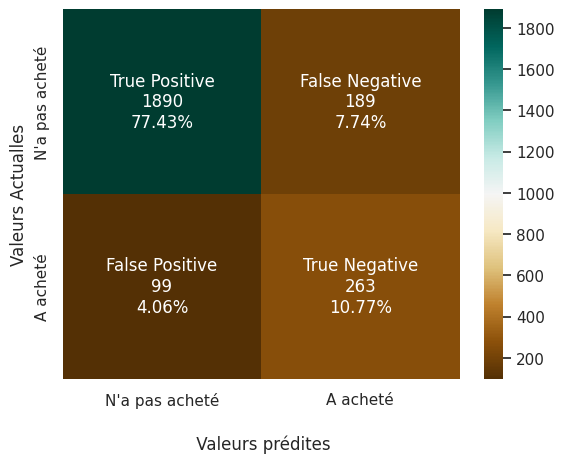

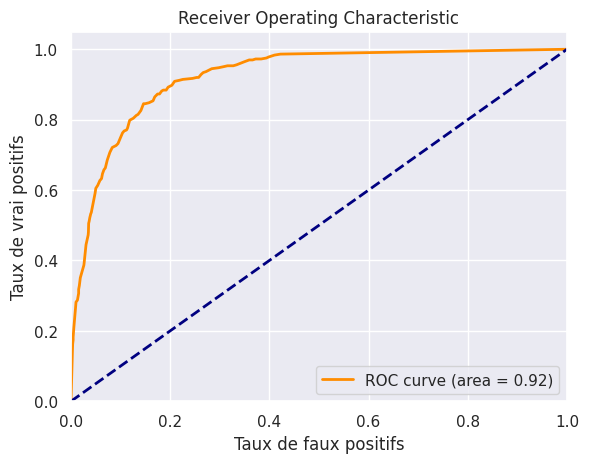

In [42]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50, random_state=42))
])


# Ajuster et prédire
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


# Prédire les probabilités pour les données de test
y_probs = pipe.predict_proba(X_test)[:, 1] # obtenir la probabilité de la classe positive


# Évaluer le modèle
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nPour Arbre de décision, Accuracy est ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion
print(confusion_matrix(y_test, y_pred))
print('\n\tMatrice de confusion pour Arbre de decision')
c_matrix_plot(y_test, y_pred)


# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Modèle de forêt aléatoire ou Random Forest**

              precision    recall  f1-score   support

       False       0.96      0.89      0.92      2079
        True       0.55      0.78      0.65       362

    accuracy                           0.87      2441
   macro avg       0.76      0.83      0.78      2441
weighted avg       0.90      0.87      0.88      2441

[[1852  227]
 [  81  281]]

Pour forêt aléatoire, Accuracy est  0.8738222040147481

	Matrice de confusion pour forêt aléatoire


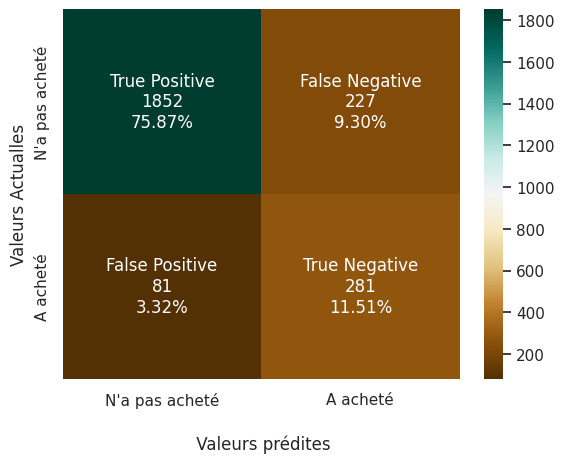

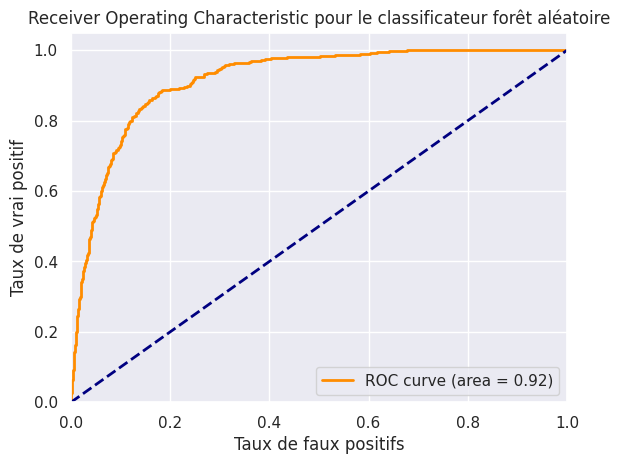

In [43]:
pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=75, max_depth=10, min_samples_leaf=50, criterion='entropy', random_state=42))
])


# Ajuster et prédire
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Prédire les probabilités pour les données de test
y_probs = pipe.predict_proba(X_test)[:, 1] # obtenir la probabilité de la classe positive


# Évaluer le modèle
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Matrice de confusion
print(confusion_matrix(y_test, y_pred))
print('\nPour forêt aléatoire, Accuracy est ', accuracy_score(y_test,y_pred))
print('\n\tMatrice de confusion pour forêt aléatoire')
c_matrix_plot(y_test, y_pred)


# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positif')
plt.title('Receiver Operating Characteristic pour le classificateur forêt aléatoire')
plt.legend(loc="lower right")
plt.show()

### Fine-tuning pour forêt aléatoire

In [44]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(k_neighbors=2, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Définir un pli K stratifié pour garantir que chaque pli est représentatif des proportions de classe
stratified_kfold = StratifiedKFold(n_splits=2)

# Définir une grille d'hyperparamètres sur lesquels rechercher
param_distributions = {
    'classifier__n_estimators': [10, 25, 50, 75, 100, 150, 250, 400],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [None, 10, 20, 30, 50],
    'classifier__min_samples_leaf': [1, 2, 4, 5, 10],
    'classifier__max_samples': np.linspace(0.1, 0.9, num=8)
}

# Nous utilisons make_scorer pour créer un objet scorer qui marque le score F1 moyen pondéré
f1_scorer = make_scorer(f1_score, average='weighted')


# Configurer la recherche aléatoire de moitié avec validation croisée
halving_search = HalvingRandomSearchCV(estimator=pipeline,
                                       param_distributions=param_distributions,
                                       scoring=f1_scorer,
                                       n_candidates='exhaust',
                                       factor=3,
                                       random_state=42,
                                       n_jobs=-1,
                                       cv=stratified_kfold)

halving_search.fit(X_train, y_train)

best_params = halving_search.best_params_
print("Best hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1220 fits failed out of a total of 2440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1220 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/pytho

Best hyperparameters: {'classifier__n_estimators': 75, 'classifier__min_samples_leaf': 4, 'classifier__max_samples': 0.9, 'classifier__max_features': 'sqrt', 'classifier__max_depth': None}



Pour forêt aléatoire, Accuracy est  0.8889799262597297
              precision    recall  f1-score   support

       False       0.95      0.92      0.93      2079
        True       0.61      0.71      0.65       362

    accuracy                           0.89      2441
   macro avg       0.78      0.82      0.79      2441
weighted avg       0.90      0.89      0.89      2441

[[1913  166]
 [ 105  257]]

	Matrice de confusion pour forêt aléatoire


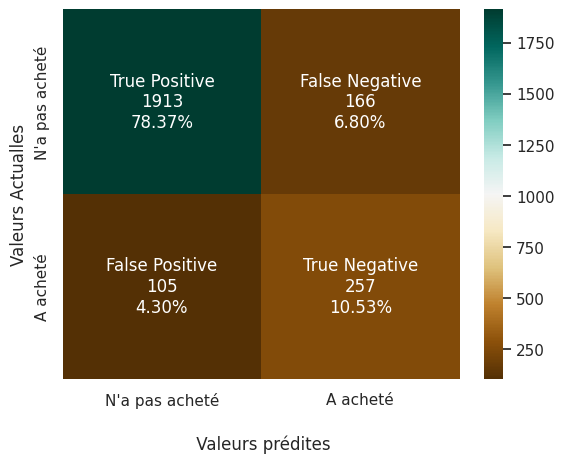

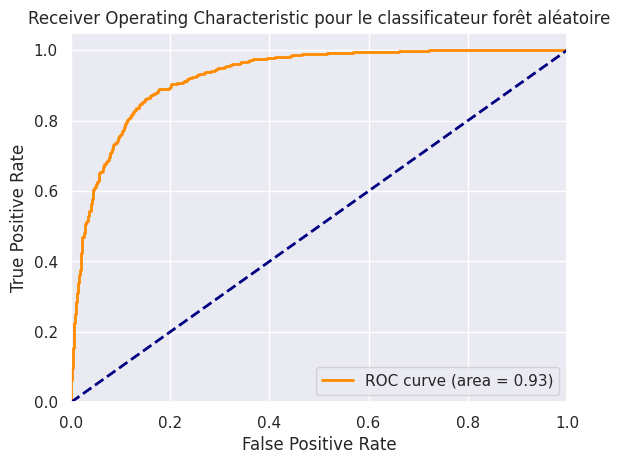

In [45]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=75, min_samples_leaf=4, max_features='sqrt', max_samples=0.9, max_depth=None, criterion='entropy', random_state=42))
])

# Ajuster et prédire
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


# Prédire les probabilités pour les données de test
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class


# Évaluer le modèle
print('\nPour forêt aléatoire, Accuracy est ', accuracy_score(y_test,y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


# Matrice de confusion
print(confusion_matrix(y_test, y_pred))
print('\n\tMatrice de confusion pour forêt aléatoire')
c_matrix_plot(y_test, y_pred)

# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic pour le classificateur forêt aléatoire')
plt.legend(loc="lower right")
plt.show()